# Google Play Store Downloads EDA
## Introduction
 Today, the use of mobile applications has become increasingly popular as it helps businesses run more effectively and efficiently. It is therefore important to carry out thorough research about your niche category in order improve customer experience and stand out against potential competitors. 

The dataset was retrieved from kaggle (https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps). It contains information of roughly 2.3 mlilion applications on Google Play Store such as downloads, installs, ratings and other information.

This analysis would help provide insights about Google Play Store downloads and answer the following questions:
1. What are the top 10 categories in terms of downloads?
2. What are the top 10 most installed apps?
3. What are the top downloaded apps in each of these categories?
4. What are the top 10 categories in terms of ratings?
5. Do free apps or paid apps have a higher rating?
6. Do ad supported apps or non-ad supported apps have a higher or lower rating?

## Data cleaning and manipulation

In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#load dataframe into pandas and view the first few rows
apps = pd.read_csv("Google-Playstore.csv")
apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
#get more details about the data
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [7]:
#Convert all column names to snake case and replace " " in the columns with "_' 
apps.rename(lambda x: x.lower().strip().replace(' ', '_'), 
            axis='columns', inplace=True)
apps.columns

Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'minimum_installs', 'maximum_installs', 'free', 'price', 'currency',
       'size', 'minimum_android', 'developer_id', 'developer_website',
       'developer_email', 'released', 'last_updated', 'content_rating',
       'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice',
       'scraped_time'],
      dtype='object')

<AxesSubplot:>

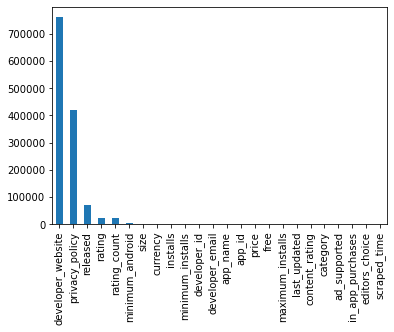

In [8]:
# Check for missing values and visualize
missing= apps.isna().sum().sort_values(ascending= False)
missing.plot(kind= "bar")

In [9]:
#drop columns that are not needed in the analysis
apps.drop(["app_id", "minimum_android", "developer_id", "developer_website", "developer_email", "privacy_policy",
           "editors_choice", "scraped_time"], axis="columns", inplace=True)

In [10]:
#drop the rows where there is insufficient data for the rest of the columns with null values
apps.dropna(inplace= True)

In [11]:
#take a look at missing values again
missing = apps.isna().sum().sort_values(ascending = False)
missing

app_name            0
category            0
rating              0
rating_count        0
installs            0
minimum_installs    0
maximum_installs    0
free                0
price               0
currency            0
size                0
released            0
last_updated        0
content_rating      0
ad_supported        0
in_app_purchases    0
dtype: int64

In [12]:
#get the total numner of rows we are working with
len(apps)

2241661

In [13]:
#replacing the names of some categories
apps['category'] = apps['category'].str.replace('Music & Audio', 'Music')
apps['category'] = apps['category'].str.replace('Educational', 'Education')
apps.category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music', 'Sports', 'Beauty',
       'Business', 'Finance', 'News & Magazines', 'Casual',
       'Art & Design', 'House & Home', 'Card', 'Events', 'Trivia',
       'Weather', 'Strategy', 'Word', 'Video Players & Editors', 'Action',
       'Simulation', 'Dating', 'Role Playing', 'Casino', 'Comics',
       'Parenting'], dtype=object)

## Analysis and Visualization

##### 1. What are the top 10 categories in terms of downloads?

In [14]:
#check to see how many apps are in each category
count_apps_cat = apps.category.value_counts()
count_apps_cat[:10]

Education            256839
Music                157546
Tools                138318
Business             136537
Entertainment        135469
Books & Reference    115534
Lifestyle            115332
Personalization       88860
Health & Fitness      80713
Productivity          75263
Name: category, dtype: int64

<AxesSubplot:>

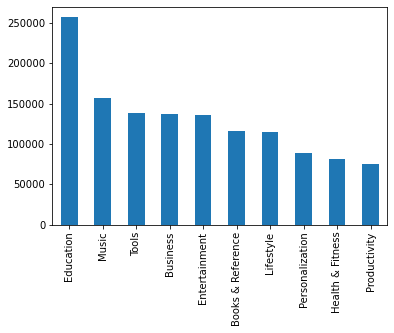

In [15]:
count_apps_cat[:10].plot(kind = 'bar')

Education has the highest number of apps on Google Play Store, followed by music.

In [16]:
#Also check for categories have the least number of apps?
count_apps_cat[-10:]

Role Playing        9202
Word                8398
Strategy            8076
Card                7915
Weather             6959
Dating              6328
Casino              4922
Libraries & Demo    4797
Parenting           3598
Comics              2768
Name: category, dtype: int64

<AxesSubplot:>

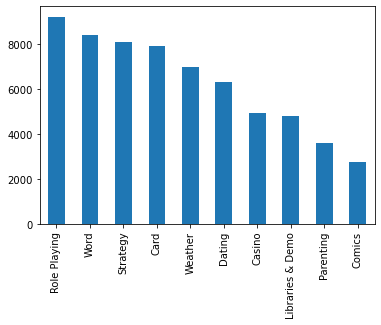

In [17]:
count_apps_cat[-10:].plot(kind = 'bar')

Comics and parenting have the least number of apps on Google Play Store.

To answer Question 1, Let's see which categories are the most downloaded based on the number of installs. We will be using the 'maximum_installs' column to calculate this.

In [25]:
#Top 10 categories by number of installs. We use maximum_installs as the number of installs
category_installs = apps.groupby(["category"])[["maximum_installs"]].sum().sort_values("maximum_installs", ascending= False)
category_installs.head(10)

,maximum_installs
category,
Tools,108140094730
Communication,71757673734
Productivity,44070317588
Photography,30945774122
Video Players & Editors,30497378962
Action,30332363333
Entertainment,30116734317
Casual,29885286313
Arcade,25373507231


<AxesSubplot:xlabel='category'>

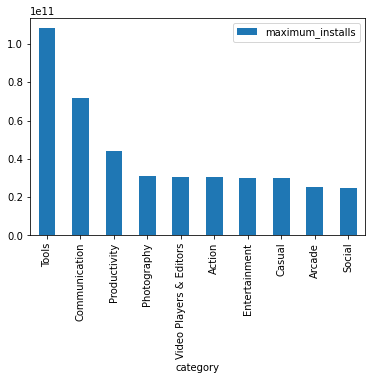

In [26]:
#visualize top 10 categories
category_installs.head(10).plot(kind = 'bar')

Not surprsisingly, the category "Tools" has the highest number of installs which probably include most popular everyday apps.

##### 2. What are top 10 most installed apps?

In [28]:
#top 10 most installed apps
most_installed_apps = apps.groupby(["app_name"])[["maximum_installs"]].sum().sort_values("maximum_installs", ascending= False)
most_installed_apps.head(10)

,maximum_installs
app_name,
Google Play services,12057627016
YouTube,9766230924
Google,9154248491
Google Text-to-Speech,9034404884
Google Chrome: Fast & Secure,8925640788
Gmail,8756574289
Google Drive,7028265259
WhatsApp Messenger,6265637751
Google TV (previously Play Movies & TV),6156518915


<AxesSubplot:xlabel='app_name'>

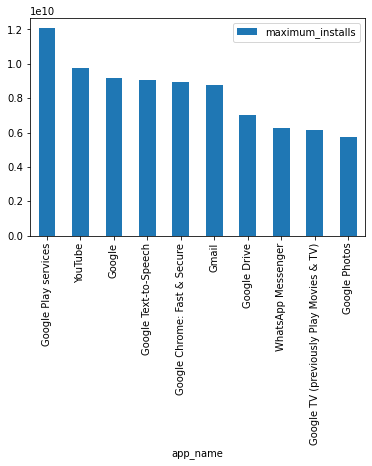

In [29]:
most_installed_apps.head(10).plot(kind = 'bar')

It looks like Google Play services is the most installed. However, it comes automatically installed on all android devices so we drop this value.

In [30]:
#Exclude Google Play services
apps = apps[apps.app_name != 'Google Play services']
most_installed_apps = apps.groupby(["app_name"])[["maximum_installs"]].sum().sort_values("maximum_installs", ascending= False)
most_installed_apps.head(10)

,maximum_installs
app_name,
YouTube,9766230924
Google,9154248491
Google Text-to-Speech,9034404884
Google Chrome: Fast & Secure,8925640788
Gmail,8756574289
Google Drive,7028265259
WhatsApp Messenger,6265637751
Google TV (previously Play Movies & TV),6156518915
Google Photos,5754179589


The most installed app on Google Play Store is YouTube

##### 3. What are the top 10 most installed apps for the top 10 categories?

In [33]:
#we exclude apps that are not in the top 10 categories
top_10_cat = ['Tools', 'Communication', 'Productivity', 'Entertainment', 'Social', 'Video Players & Editors', 'Photography', 'Action', 'Casual', 'Arcade']
apps_with_top_10_cat = apps[apps.category.isin(top_10_cat)]


apps_with_top_10_cat.head(10)

,app_name,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,currency,size,released,last_updated,content_rating,ad_supported,in_app_purchases
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False
5,IMOCCI,Social,0.0,0.0,50+,50.0,89,True,0.0,USD,46M,"Dec 24, 2018","Dec 20, 2019",Teen,False,True
17,All in one shopping app,Tools,5.0,6.0,50+,50.0,62,True,0.0,USD,2.0M,"Apr 24, 2019","May 05, 2019",Everyone,False,False
20,Nepali Congress,Social,0.0,0.0,100+,100.0,336,True,0.0,USD,24M,"May 31, 2021","May 31, 2021",Everyone,False,False
23,Coloring Book Barbaie,Entertainment,3.8,736.0,"500,000+",500000.0,646456,True,0.0,USD,20M,"Apr 21, 2019","Nov 13, 2020",Everyone,True,False
24,Random Number Generator,Tools,4.2,35.0,"10,000+",10000.0,21124,True,0.0,USD,2.4M,"May 28, 2017","May 30, 2020",Everyone,True,False
25,Sticky Ball,Arcade,4.6,11.0,100+,100.0,152,True,0.0,USD,25M,"Mar 5, 2018","Mar 26, 2018",Everyone,True,True


Let's look at the most installed app for each category 

In [34]:
#Create a dataframe using: "app_name", "category" and "maximum installs" for the top 10 categories
filtered_top_apps_by_cat = apps_with_top_10_cat[['app_name', 'category', 'maximum_installs']].sort_values('maximum_installs', ascending = False)
filtered_top_apps_by_cat.head(10)

,app_name,category,maximum_installs
881403,YouTube,Video Players & Editors,9766230924
1773294,Google,Tools,9154248491
1060335,Google Text-to-Speech,Tools,9034404884
944254,Google Chrome: Fast & Secure,Communication,8925640788
2099458,Gmail,Communication,8756574289
893676,Google Drive,Productivity,7028265259
385470,WhatsApp Messenger,Communication,6265637751
167781,Google TV (previously Play Movies & TV),Video Players & Editors,6156518915
1830962,Google Photos,Photography,5754179589
2095852,Messenger – Text and Video Chat for Free,Communication,5054312355


In [35]:
#to get the top app for each category
#create dictionary with categories as the keys and empty values
top_app_names_by_cat = {'Tools': '','Communication': '', 'Productivity': '', 'Video Players & Editors': '', 'Action':'', 'Entertainment': '', 'Casual': '', 'Arcade':'', 'Social': ''}

for x in top_10_cat:
    filtered = filtered_top_apps_by_cat[filtered_top_apps_by_cat['category'] == x]
    name = filtered.iloc[0]['app_name']
    top_app_names_by_cat[x] = name
top_app_names_by_cat

{'Tools': 'Google',
 'Communication': 'Google Chrome: Fast & Secure',
 'Productivity': 'Google Drive',
 'Video Players & Editors': 'YouTube',
 'Action': 'Garena Free Fire - Rampage',
 'Entertainment': 'Google Play Games',
 'Casual': 'Candy Crush Saga',
 'Arcade': 'Subway Surfers',
 'Social': 'Currents',
 'Photography': 'Google Photos'}

These are the top 10 most installed categories with their corresponding most installed apps.

##### 4. What are the top 10 categories in terms of ratings?

In [36]:
# we select the columns we need by creating a dataframe using only the columns that we need
apps_rating = apps[["category", "rating", "rating_count"]]
#we also omit apps with less than 10 ratings
apps_rating = apps_rating[apps_rating["rating_count"] > 10]


In [37]:
#filter out rating count column
apps_rating = apps_rating[["category", "rating"]]
apps_rating

,category,rating
1,Tools,4.4
6,Libraries & Demo,4.5
7,Lifestyle,2.0
9,Personalization,4.7
10,Racing,4.9
...,...,...
2312931,Entertainment,2.8
2312932,Action,4.3
2312933,Music,4.0
2312938,Education,3.4


In [38]:
#Let's get the top categories by rating. We will do this by calculating the mean of each category's rating.
rating_mean = {}

for x in apps_rating['category']:
    if x not in rating_mean:
        rating_mean[x] = None
rating_mean
 

{'Tools': None,
 'Libraries & Demo': None,
 'Lifestyle': None,
 'Personalization': None,
 'Racing': None,
 'Travel & Local': None,
 'Food & Drink': None,
 'Puzzle': None,
 'Entertainment': None,
 'Arcade': None,
 'Maps & Navigation': None,
 'Auto & Vehicles': None,
 'Photography': None,
 'Health & Fitness': None,
 'Shopping': None,
 'Books & Reference': None,
 'Sports': None,
 'Finance': None,
 'Music': None,
 'News & Magazines': None,
 'House & Home': None,
 'Education': None,
 'Business': None,
 'Card': None,
 'Events': None,
 'Productivity': None,
 'Weather': None,
 'Board': None,
 'Social': None,
 'Adventure': None,
 'Medical': None,
 'Strategy': None,
 'Word': None,
 'Beauty': None,
 'Video Players & Editors': None,
 'Action': None,
 'Simulation': None,
 'Casual': None,
 'Trivia': None,
 'Art & Design': None,
 'Dating': None,
 'Role Playing': None,
 'Communication': None,
 'Comics': None,
 'Casino': None,
 'Parenting': None}

In [39]:
for x in rating_mean:
    mean = apps_rating.loc[apps_rating['category'] == x, 'rating'].mean()
    rating_mean[x] = mean
rating_mean

{'Tools': 3.9065008521998026,
 'Libraries & Demo': 4.0795381310418986,
 'Lifestyle': 4.090446485583705,
 'Personalization': 4.255502019861999,
 'Racing': 3.9751015942482018,
 'Travel & Local': 4.007391616551473,
 'Food & Drink': 4.122804031050004,
 'Puzzle': 4.206879606879594,
 'Entertainment': 3.990452793686282,
 'Arcade': 4.204442593363846,
 'Maps & Navigation': 3.8802969079409713,
 'Auto & Vehicles': 3.857521726101302,
 'Photography': 3.895232965257213,
 'Health & Fitness': 3.991402714932121,
 'Shopping': 4.126252220248677,
 'Books & Reference': 4.307820743121891,
 'Sports': 4.0530504874987905,
 'Finance': 3.966730686446554,
 'Music': 4.283366692082812,
 'News & Magazines': 4.114649681528672,
 'House & Home': 3.762042025862053,
 'Education': 4.185299058188553,
 'Business': 3.9777829270553284,
 'Card': 4.037012495266936,
 'Events': 4.238588655649832,
 'Productivity': 3.983148786389926,
 'Weather': 4.123513050919985,
 'Board': 4.046360218728645,
 'Social': 4.149286862714595,
 'Adventu

In [40]:
rating_mean = sorted(rating_mean.items(), key = lambda kv:kv[1], reverse = True)
rating_mean[:10]

[('Books & Reference', 4.307820743121891),
 ('Music', 4.283366692082812),
 ('Personalization', 4.255502019861999),
 ('Events', 4.238588655649832),
 ('Word', 4.216697819314642),
 ('Puzzle', 4.206879606879594),
 ('Arcade', 4.204442593363846),
 ('Education', 4.185299058188553),
 ('Casino', 4.149409392106021),
 ('Social', 4.149286862714595)]

These are the top 10 categories in terms of rating, with 'Books & References' topping the list

##### 5.  Do free apps or paid apps have a higher rating? (minimum of 100 ratings)?

In [47]:
#We create a dataframe with the columns that we need
apps_fp = apps[['rating', 'free', 'rating_count']]

#remove apps with less than 100 rating count
apps_fp = apps_fp[apps_fp.rating_count > 99]
apps_fp

,rating,free,rating_count
9,4.7,True,820.0
12,3.9,True,118.0
14,3.7,True,1572.0
18,3.7,True,328.0
22,4.4,True,211.0
...,...,...,...
2312905,2.9,True,356.0
2312913,2.0,True,1687.0
2312931,2.8,True,1002.0
2312932,4.3,True,103466.0


In [99]:
#mean of paid apps
p_mean = apps_fp.loc[apps_fp['free'] == False, 'rating'].mean()
p_mean

4.16163680069927

In [100]:
#mean of free apps
p_mean = apps_fp.loc[apps_fp['free'] == True, 'rating'].mean()
p_mean

4.031493964981973

Paid apps have higher ratings than free apps

##### 6. Do ad supported apps or non-ad supported apps have a higher rating? (minimum of 100 ratings.)

In [52]:
#create a dataframe with the columns needed
apps_ad = apps[['rating', 'rating_count', 'ad_supported']]
apps_ad = apps_ad[apps_ad.rating_count > 99]
apps_ad

,rating,rating_count,ad_supported
9,4.7,820.0,True
12,3.9,118.0,True
14,3.7,1572.0,False
18,3.7,328.0,False
22,4.4,211.0,True
...,...,...,...
2312905,2.9,356.0,False
2312913,2.0,1687.0,False
2312931,2.8,1002.0,True
2312932,4.3,103466.0,True


In [53]:
#find the mean of ad-supported apps
mean_apps_ad = apps_ad.loc[apps_ad['ad_supported'] == True, 'rating'].mean()
mean_apps_ad

4.089361466994799

In [54]:
#find the mean of non-ad-supported apps
mean_apps_n_ad = apps_ad.loc[apps_ad['ad_supported'] == False, 'rating'].mean()
mean_apps_n_ad

3.922527973089741

Ad-supported apps have higher ratings than non-ad-supported ones

## Answers
1. What are the top 10 categories in terms of downloads?
* category	
* Tools
*Communication	
*Productivity	
*Photography	
*Video Players & Editors	
*Action	
*Entertainment	
*Casual	
*Arcade	
*Social

2. What are top 10 most installed apps?	
* YouTube	
* Google	
*Google Text-to-Speech	
*Google Chrome: Fast & Secure
*Gmail
*Google Drive
*WhatsApp Messenger
*Google TV (previously Play Movies & TV)
*Google Photos
*Messenger – Text and Video Chat for Free

3. What are the top 10 most installed apps for the top 10 categories?
* Tools: Google
* Communication: Google Chrome: Fast & Secure
* Productivity: Google Drive
*Video Players & Editors: YouTube
*Action: Garena Free Fire - Rampag
*Entertainment: Google Play Games
*Casual: Candy Crush Saga
*Arcade: Subway Surfer
*Social: Currents
*Photography: Google Photos

4. What are the top 10 categories in terms of ratings?
* Books & Reference: 4.31 stars
* Music: 4.28 stars
*Personalization: 4.25 stars
*Events: 4.24 stars
*Word: 4.22 stars
*Puzzle: 4.21 stars
*Arcade: 4.20 stars
*Education: 4.19 stars
*Casino: 4.15 stars
*Social: 4.15 stars

5. Do free apps or paid apps have a higher rating? (minimum of 100 ratings)?
    Paid apps have higher ratings than free apps
    

6. Do ad supported apps or non-ad supported apps have a higher rating? (minimum of 100 ratings.)
    Ad-supported apps have higher ratings than non-ad-supported ones


# Summary and Conclusion
Tools, Communication and Productivity seem to be the most downloaded categories. There is a possiblity that this result is skewed because of apps like Google which come already installed to every android device. From our analysis we can observe that 6 out of the top 10 apps of the categories are Google apps.

Our analysis of the top categories by ratings further provides a clearer picture of what apps are favored more by consumers. This is because people choose to leave ratings, which better reflects the opinion of the public. It is also better metric because there is a range of 0.0 through 5.0 to base our analysis on, while the install count is just a single count of installs. Books & Reference is the top category based on this metric.

The analysis also showed that paid apps have a higher rating on average. This may be because that in order to justify charging money for an app, the app has to be high-quality enough for a customer to want to buy it.

The final part of our analysis determined that ad-supported apps have a higher rating than non ad-supported apps. This could be for the same reason that paid apps are rated higher than free apps. The ad-supported apps may be higher quality, but instead of charging money for apps, developers will implement ads and list the applciation in the store for free.